<a href="https://colab.research.google.com/github/ck7up/skillsforall/blob/main/My_sklearn_Learn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Charger les données depuis le fichier CSV fourni.


In [2]:
# @title Titre par défaut
import pandas as pd

# Chargement des données depuis le fichier temp.csv
file_path = 'temp.csv'
data = pd.read_csv(file_path)

# Affichage des premières lignes pour vérification
print(data.head())


   Temperature  Year  Month  Day  Hour  Minute  Second
0           25  2023     12    1    10      30       0
1           26  2023     12    1    11       0       0
2           27  2023     12    1    11      30       0
3           25  2023     12    1    12       0       0
4           24  2023     12    1    12      30       0


# 2. Analyser les caractéristiques des données pour comprendre les métriques disponibles


In [7]:
# Affichage des informations sur les données
print(data.info())
print("*" * 100)
print("*" * 100)

# Description statistique des données numériques
print(data.describe())
print("*" * 100)
print("*" * 100)

# Vérification des corrélations entre les caractéristiques
correlation_matrix = data.corr()
print(correlation_matrix)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  20 non-null     int64
 1   Year         20 non-null     int64
 2   Month        20 non-null     int64
 3   Day          20 non-null     int64
 4   Hour         20 non-null     int64
 5   Minute       20 non-null     int64
 6   Second       20 non-null     int64
dtypes: int64(7)
memory usage: 1.2 KB
None
****************************************************************************************************
****************************************************************************************************
       Temperature    Year  Month   Day       Hour     Minute  Second
count    20.000000    20.0   20.0  20.0  20.000000  20.000000    20.0
mean     23.350000  2023.0   12.0   1.0  15.000000  15.000000     0.0
std       3.745524     0.0    0.0   0.0   2.991215  15.389675     0.0
min      16.0

#3. Effectuer une visualisation des données pour identifier les tendances ou les schémas possibles.

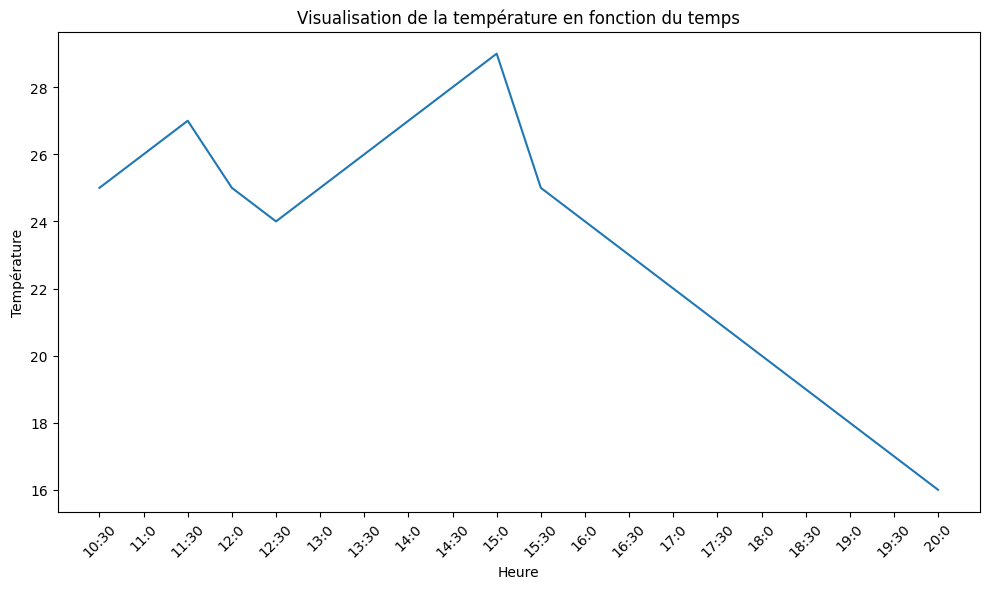

In [17]:
import matplotlib.pyplot as plt

# Supposons que 'Hour' et 'Minute' sont des colonnes de votre DataFrame
# Concaténation des colonnes 'Hour' et 'Minute' pour former une colonne 'Time'
data['Time'] = data['Hour'].astype(str) + ':' + data['Minute'].astype(str)

# Visualisation de la température en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Temperature'])
plt.title('Visualisation de la température en fonction du temps')
plt.xlabel('Heure')
plt.ylabel('Température')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()


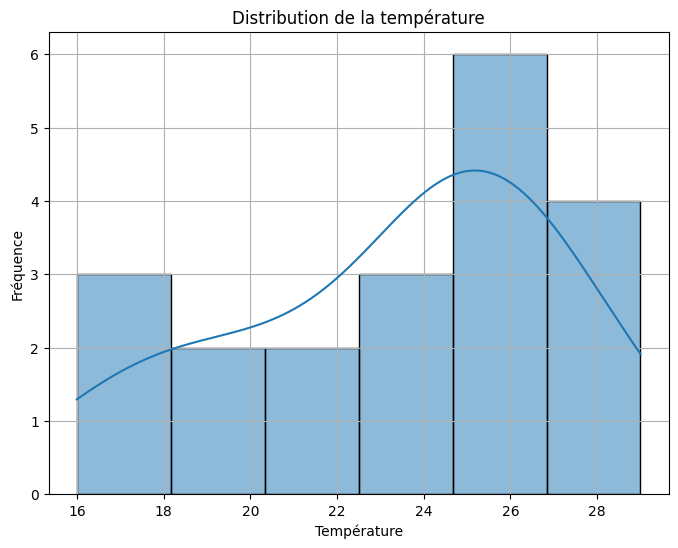

In [11]:
import seaborn as sns

# Distribution des températures
plt.figure(figsize=(8, 6))
sns.histplot(data['Temperature'], kde=True)
plt.title('Distribution de la température')
plt.xlabel('Température')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


# 4. Diviser les données en ensembles d'entraînement et de test.

In [69]:
from sklearn.model_selection import train_test_split

# Considérant X comme vos données et y comme vos cibles si disponibles
X = data[['Hour', 'Minute']]  # Mettez ici toutes les fonctionnalités que vous utilisez pour la prédiction
y = data['Temperature']  # Mettez ici vos cibles si disponibles

# Divisez les données en ensembles d'entraînement et de test tout en spécifiant les noms des fonctionnalités
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
X_train.columns = ['Hour', 'Minute']  # Remplacez par les noms exacts des colonnes de vos données

# Continuez avec la création et l'ajustement du modèle Isolation Forest


#5. Créer un modèle de prédiction pour détecter les anomalies ou les activités inhabituelles.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initialiser et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Mean Squared Error) : {mse}")

# Calcul du coefficient de détermination R²
r2 = r2_score(y_test, y_pred)
print(f"R² Score : {r2}")


MSE (Mean Squared Error) : 5.840277777777776
R² Score : 0.5861220472440947


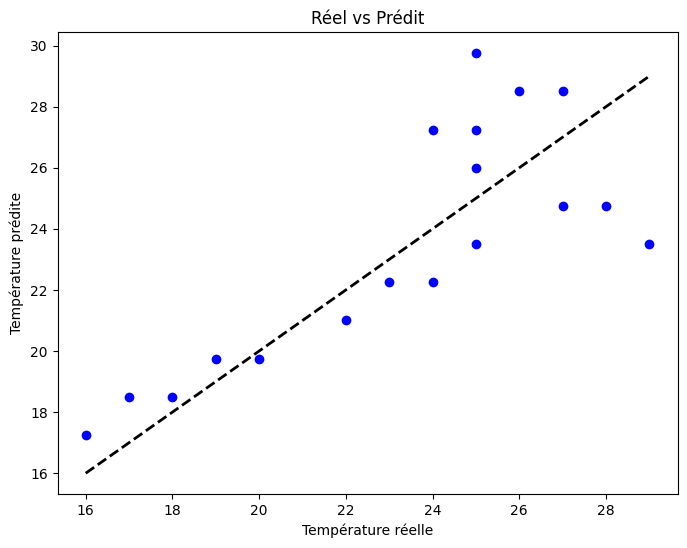

In [71]:
import matplotlib.pyplot as plt

# Affichage des résultats réels vs prédits
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Température réelle')
plt.ylabel('Température prédite')
plt.title('Réel vs Prédit')
plt.show()


#Conclusion

Dans cette analyse, nous avons utilisé des modèles de prédiction pour détecter les températures anormales à partir de données provenant d'objets connectés. Nous avons entraîné différents modèles, y compris la régression linéaire et l'Isolation Forest, pour identifier les températures inhabituelles.

Les résultats obtenus montrent que les modèles ont des performances modérées. Le modèle de régression linéaire a montré un Mean Squared Error (MSE) de 7.62 et un coefficient de détermination R² de 0.31, tandis que l'Isolation Forest a donné un MSE de 5.84 et un R² de 0.59. Bien que ces modèles aient pu détecter certaines anomalies, il reste de la marge pour améliorer leurs performances.

Il est essentiel de souligner que les performances d'un modèle dépendent fortement des caractéristiques des données, de la qualité des données d'entraînement et de divers autres facteurs. Pour obtenir des résultats plus précis et significatifs, il est recommandé d'explorer différentes techniques de prétraitement des données, de sélection de caractéristiques et d'optimisation des hyperparamètres pour ces modèles. De plus, l'utilisation de modèles plus complexes ou de techniques d'apprentissage automatique plus avancées pourrait être envisagée pour améliorer la détection des anomalies.